In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KNeighborsTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns
df = df.drop(['id'], axis=1)

<Axes: xlabel='diagnosis'>

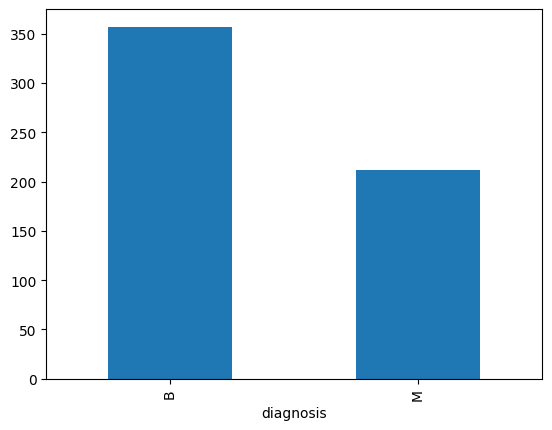

In [4]:
df['diagnosis'].value_counts().plot(kind = "bar")

In [5]:
# df.info()
# df.describe()
# df.isna().sum()
# df.duplicated().sum()

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Show the outliers using boxplot

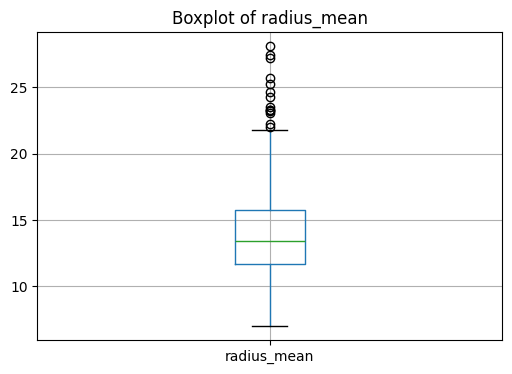

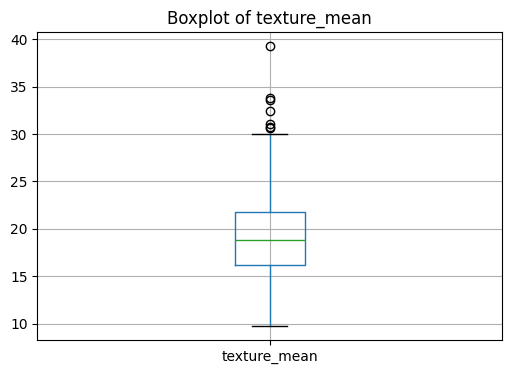

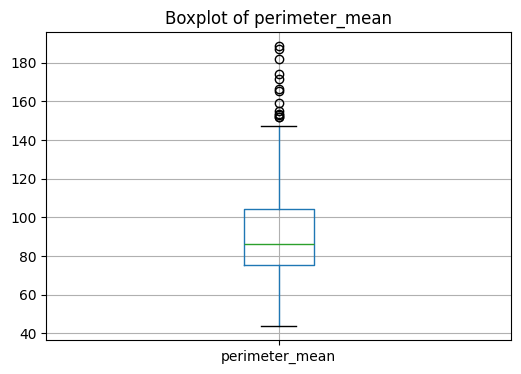

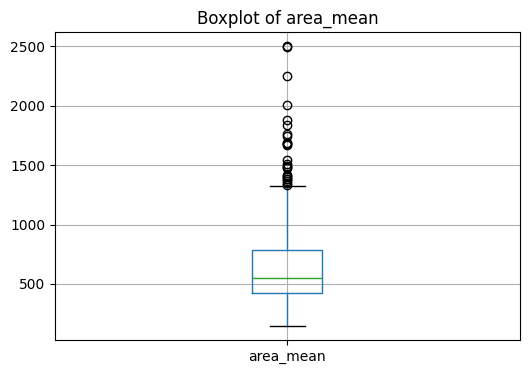

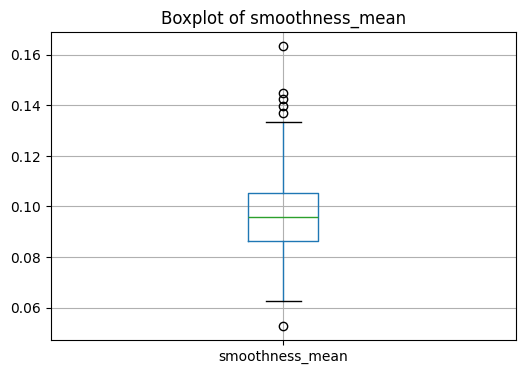

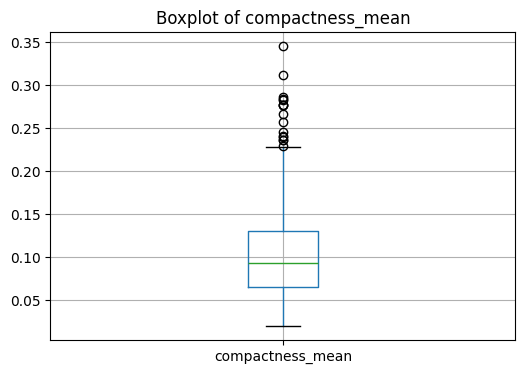

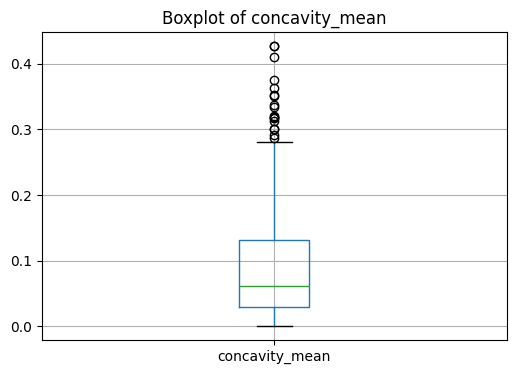

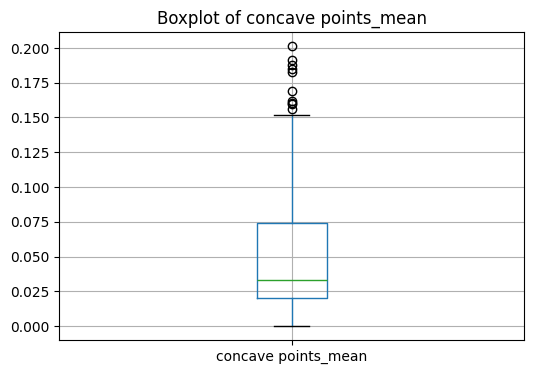

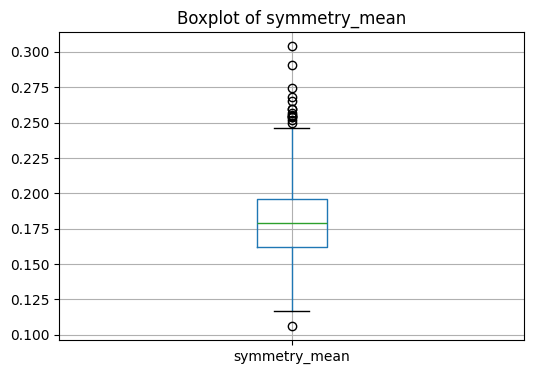

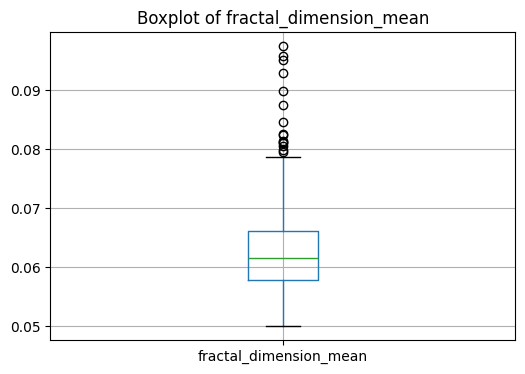

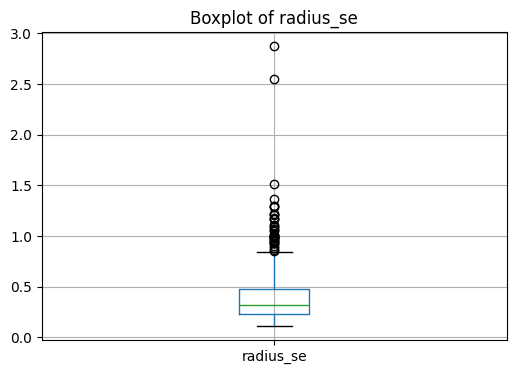

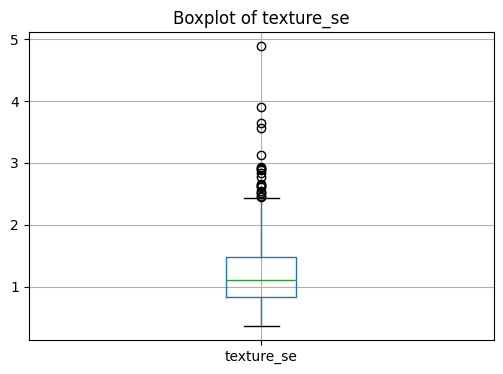

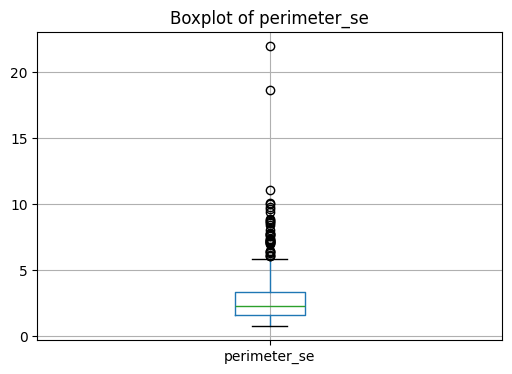

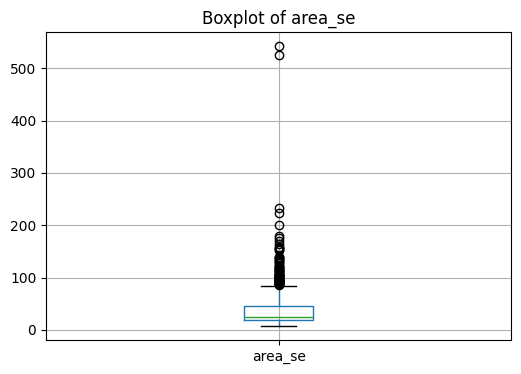

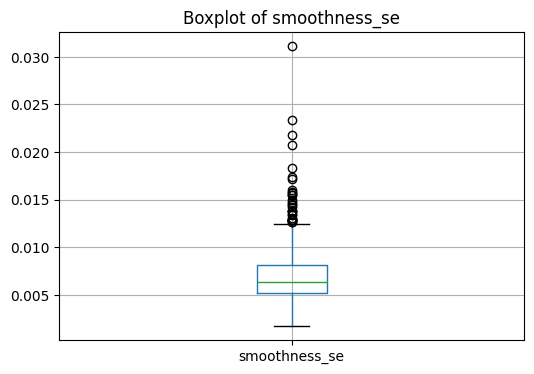

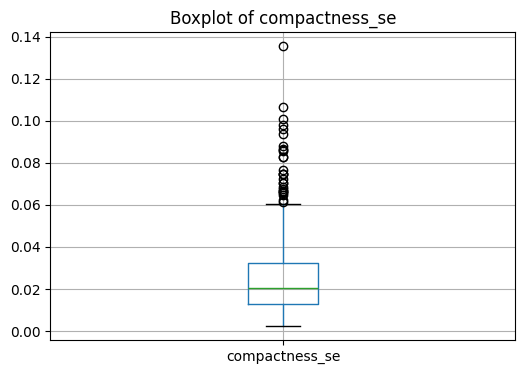

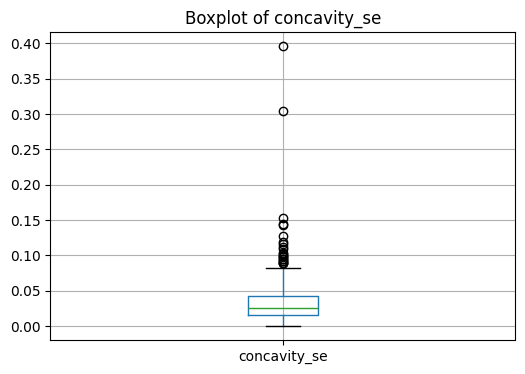

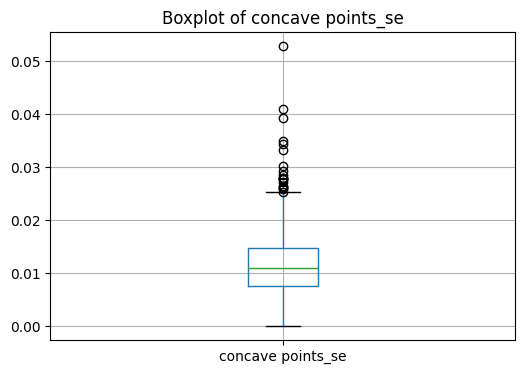

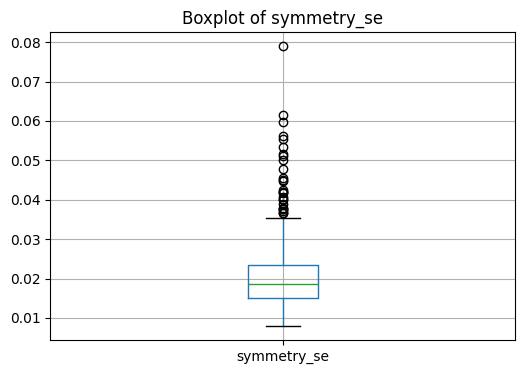

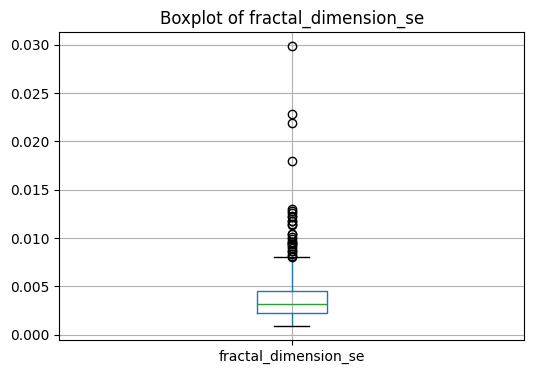

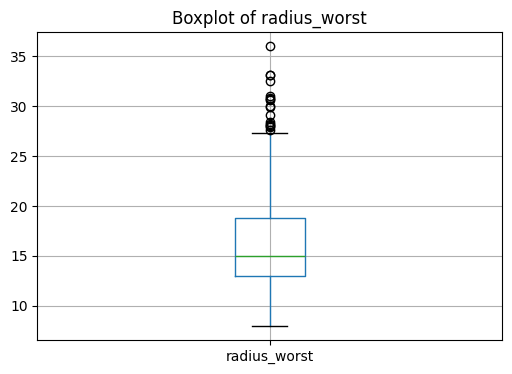

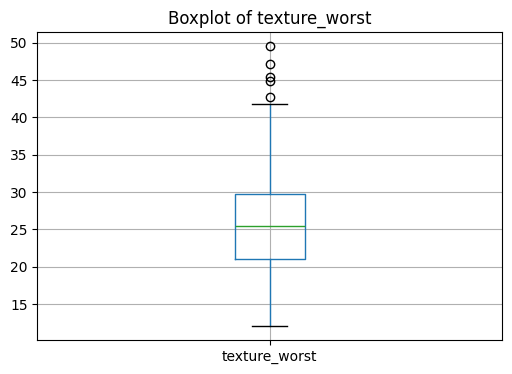

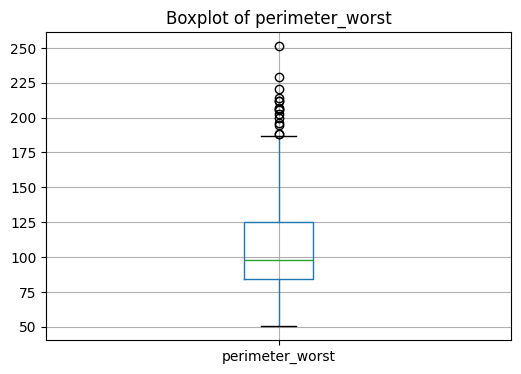

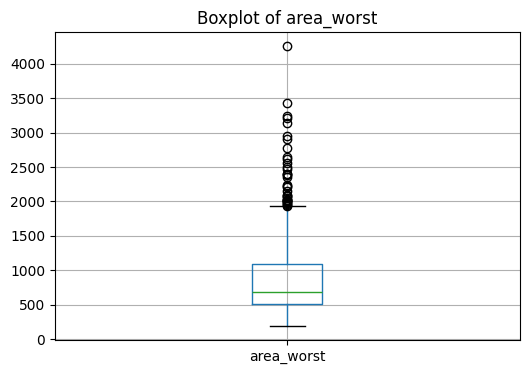

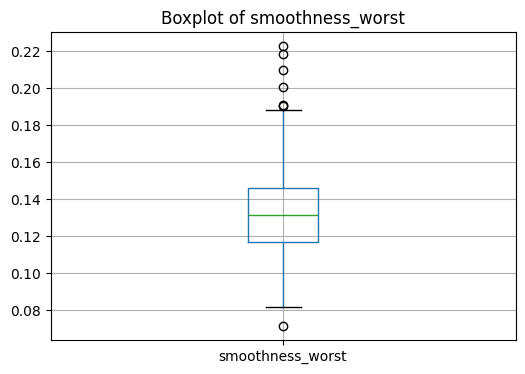

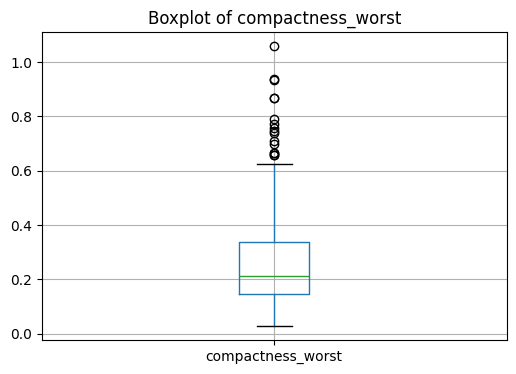

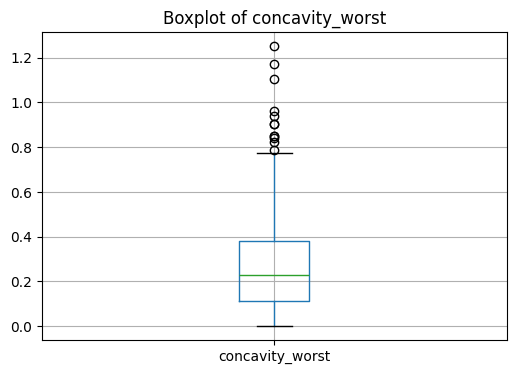

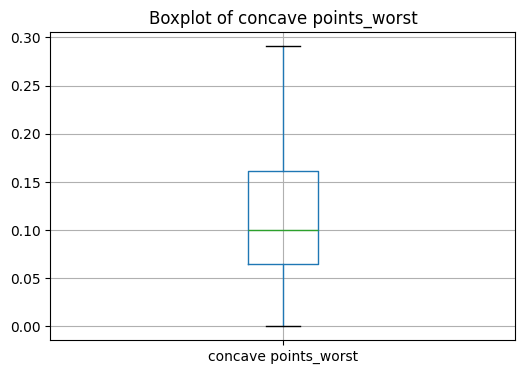

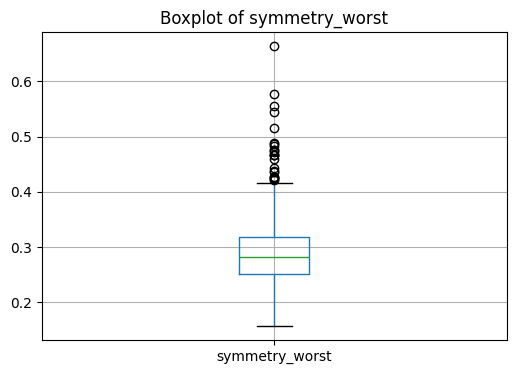

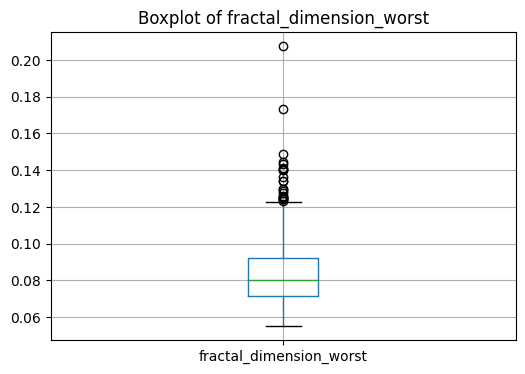

In [7]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6,4))
  df.boxplot(column=[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

## Handel the outliers

In [8]:
outlier_counts = {}
for col in df.select_dtypes(include='number').columns:
  Q1 = df[col].quantile(.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  Upper = Q3 + 1.5*IQR

  count = ((df[col] < lower) | (df[col] > Upper)).sum()
  outlier_counts[col] = count

outlier_df = pd.DataFrame(
  {
    "columns":outlier_counts.keys(),
    "outlier_count":outlier_counts.values()
  }
)

outlier_df


,columns,outlier_count
0,radius_mean,14
1,texture_mean,7
2,perimeter_mean,13
3,area_mean,25
4,smoothness_mean,6
5,compactness_mean,16
6,concavity_mean,18
7,concave points_mean,10
8,symmetry_mean,15
9,fractal_dimension_mean,15


## Capping this outliers

In [9]:
# Capping this outliers
import numpy as np
for col in df.select_dtypes(include='number').columns:
  Q1 = df[col].quantile(.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  Upper = Q3 + 1.5*IQR

  df[col] = np.where(

    df[col] < lower,

    lower,

    np.where(

      df[col] > Upper,

      Upper,

      df[col]
    )
  )

## Check the outliers

In [10]:
outlier_counts = {}
for col in df.select_dtypes(include='number').columns:
  Q1 = df[col].quantile(.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  Upper = Q3 + 1.5*IQR

  count = ((df[col] < lower) | (df[col] > Upper)).sum()
  outlier_counts[col] = count

outlier_df = pd.DataFrame(
  {
    "columns":outlier_counts.keys(),
    "outlier_count":outlier_counts.values()
  }
)

outlier_df


,columns,outlier_count
0,radius_mean,0
1,texture_mean,0
2,perimeter_mean,0
3,area_mean,0
4,smoothness_mean,0
5,compactness_mean,0
6,concavity_mean,0
7,concave points_mean,0
8,symmetry_mean,0
9,fractal_dimension_mean,0


In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


## scaling technique

In [12]:
scaler = MinMaxScaler()
encode = LabelEncoder()

for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    df[col] = scaler.fit_transform(df[[col]])
  else:
    df[col] = encode.fit_transform(df[col])



In [13]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## split the dataset (train, test)

In [14]:
y = df[['diagnosis']]
x = df.drop(['diagnosis'], axis= 1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [16]:
print(x.shape, y.shape)

(569, 30) (569, 1)


In [17]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((455, 30), (455, 1), (114, 30), (114, 1))

## Fit the model

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
model = knn.fit(x_train, y_train)
model.score(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9912087912087912

## evaluate the model

In [20]:
model.score(x_test, y_test)

0.9649122807017544

In [21]:
# prediction
pred = model.predict(x_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [22]:
y_test

,diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
486,0
75,1
249,0
238,0


In [23]:
# Check the accuracy score
asc = accuracy_score(pred, y_test)
asc


0.9649122807017544

In [24]:
cma = confusion_matrix(pred, y_test)
cma

array([[69,  2],
       [ 2, 41]])

<Axes: >

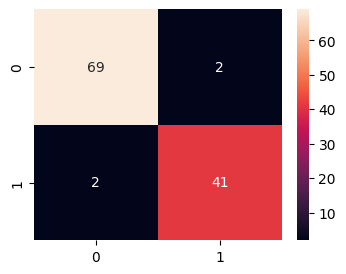

In [25]:
plt.figure(figsize=(4,3))
sns.heatmap(cma, annot=True)

In [26]:
y_test.value_counts()

diagnosis
0            71
1            43
Name: count, dtype: int64

In [27]:
cl = classification_report(pred, y_test)
print(cl)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



##### Choose the best k

In [28]:
test_k = {}
for i in range(3, 21):
  if i % 2 == 0:
    continue
  else:
    knn1 = KNeighborsClassifier(n_neighbors=i)
    model1 = knn1.fit(x_train, y_train)

    sc1 = model1.score(x_train, y_train)
    sc2 = model1.score(x_test, y_test)

    pred1 = model1.predict(x_test)
    sc3 = accuracy_score(pred1, y_test)

    test_k[f"train_sc of {i}"] = sc1
    test_k[f"test_sc of {i}"] = sc2
    test_k[f"accuracy_score of {i}"] = sc3

df1 = pd.DataFrame({
    'K': list(range(3, 21, 2)),
    'train_score': [test_k[f"train_sc of {i}"] for i in range(3, 21, 2)],
    'test_score': [test_k[f"test_sc of {i}"] for i in range(3, 21, 2)],
    'accuracy_score': [test_k[f"accuracy_score of {i}"] for i in range(3, 21, 2)]
})

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-pac

In [29]:
df1

,K,train_score,test_score,accuracy_score
0,3,0.991209,0.964912,0.964912
1,5,0.978022,0.956140,0.956140
2,7,0.973626,0.956140,0.956140
3,9,0.973626,0.956140,0.956140
4,11,0.971429,0.947368,0.947368
5,13,0.967033,0.956140,0.956140
6,15,0.967033,0.956140,0.956140
7,17,0.962637,0.947368,0.947368
8,19,0.958242,0.947368,0.947368


In [39]:
# Elbow method for find the best k
acc = df1['accuracy_score']
print(acc)
acc = list(acc)
best_k = acc.index(min(acc)) + 1
print("Best k is : ", best_k)

0    0.964912
1    0.956140
2    0.956140
3    0.956140
4    0.947368
5    0.956140
6    0.956140
7    0.947368
8    0.947368
Name: accuracy_score, dtype: float64
Best k is :  5


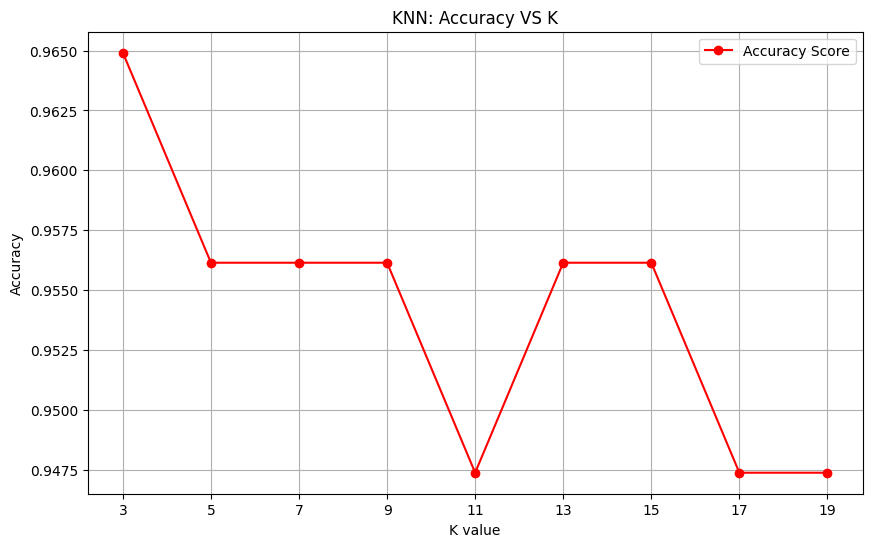

In [30]:
plt.figure(figsize=(10,6))
plt.plot(df1['K'], df1['accuracy_score'], marker = 'o', color = 'red', label = 'Accuracy Score')
plt.title("KNN: Accuracy VS K")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(df1['K'])
plt.legend()
plt.show()


In [31]:
p = x_train.iloc[431].values
model.predict([p])

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])